<a href="https://colab.research.google.com/github/notnsas/cautious-eureka/blob/version-1/aplikasi_ds/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NO 1**

In [888]:
# Manipulasi data
import pandas as pd
import numpy as np

# Kaggle Hub buat import dataset
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Pemodelan dan Evaluasi
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [889]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]


# Set the path to the file you'd like to load
# file_path = "DATA RUMAH.xlsx"
file_path = "HARGA RUMAH JAKSEL.xlsx"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "wisnuanggara/daftar-harga-rumah",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipython-input-889-2058605452.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [890]:
# Agar data tidak terpotong
pd.set_option('display.max_colwidth', None)

# Mengganti nama kolom dari unnamed ke nama kolom yang benar
df.columns = df.iloc[0]

# Menghapus row yang salah
df = df.drop(0, axis=0).reset_index(drop=True)

# Liat data teratas
df.head(15)

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL
5,10000000000,460,300,4,4,ADA,JAKSEL
6,7600000000,278,350,4,4,ADA,JAKSEL
7,5250000000,511,300,3,2,ADA,JAKSEL
8,670000000,70,69,3,2,TIDAK ADA,JAKSEL
9,480000000,66,42,2,1,TIDAK ADA,JAKSEL


In [891]:
# Informasi dari data (type data, jumlah data yang non-null, dll)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   object
 1   LT      1001 non-null   object
 2   LB      1001 non-null   object
 3   JKT     1001 non-null   object
 4   JKM     1001 non-null   object
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: object(7)
memory usage: 54.9+ KB


In [892]:
# Mengganti nomor yang masing object
df[["HARGA", "LT", "LB", "JKT", "JKM"]] = df[["HARGA", "LT", "LB", "JKT", "JKM"]].astype(float)

# Memastikan type data sudah benar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HARGA   1001 non-null   float64
 1   LT      1001 non-null   float64
 2   LB      1001 non-null   float64
 3   JKT     1001 non-null   float64
 4   JKM     1001 non-null   float64
 5   GRS     1001 non-null   object 
 6   KOTA    1001 non-null   object 
dtypes: float64(5), object(2)
memory usage: 54.9+ KB


## **EDA**

In [893]:
# Ringkasan statistika
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
HARGA,1001.0,1.747472e+10,2.079548e+10,430000000.0,6.750000e+09,1.350000e+10,2.000000e+10,2.500000e+11
LT,1001.0,5.305045e+02,5.310698e+02,22.0,2.200000e+02,4.000000e+02,6.770000e+02,6.790000e+03
LB,1001.0,4.872757e+02,4.528723e+02,38.0,3.000000e+02,4.110000e+02,6.000000e+02,1.000000e+04
JKT,1001.0,4.457542e+00,2.004606e+00,1.0,4.000000e+00,4.000000e+00,5.000000e+00,2.700000e+01
JKM,1001.0,3.940060e+00,1.903261e+00,1.0,3.000000e+00,4.000000e+00,4.000000e+00,2.700000e+01


In [894]:
# Memeriksa data duplikat
print(f'Jumlah data duplikat :  {df.duplicated().sum()}')
print(f'Jumlah baris sebelum menghapus duplikat: {len(df)}')

# Menghapus data dupliksa
df = df.drop_duplicates().reset_index(drop=True)

# Memverifikasi setelah penanganan
print(f'Jumlah baris setelah menghapus duplikat : {len(df)}')

Jumlah data duplikat :  70
Jumlah baris sebelum menghapus duplikat: 1001
Jumlah baris setelah menghapus duplikat : 931


In [895]:
# Memeriksa nilai yang hilang (missing values)
df.isna().sum()

,0
0,
HARGA,0
LT,0
LB,0
JKT,0
JKM,0
GRS,0
KOTA,0


Kolom Numerik Berupa :  Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM'], dtype='object', name=0)

Visualisasi Distribusi Setiap Fitur:


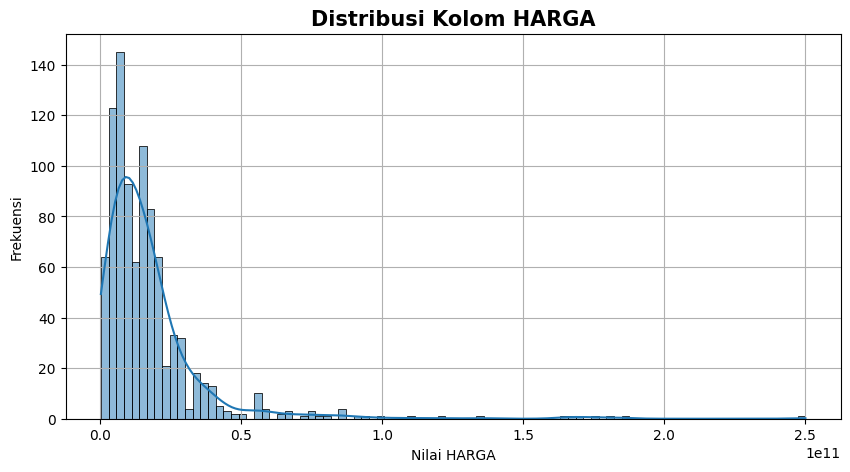

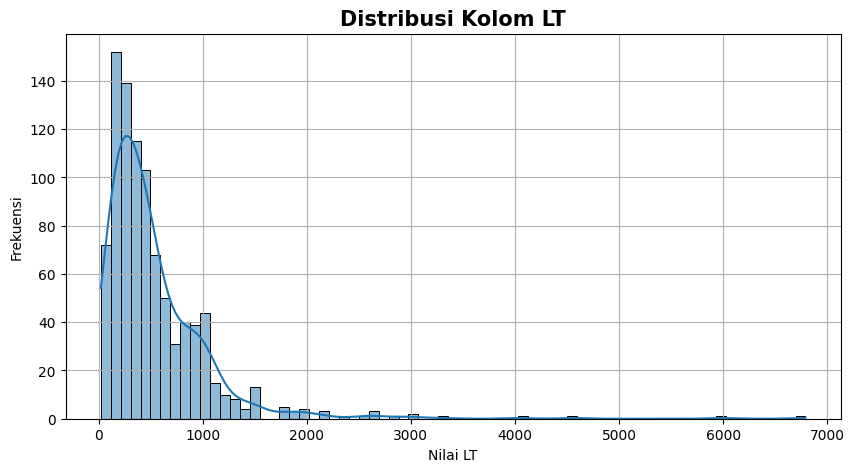

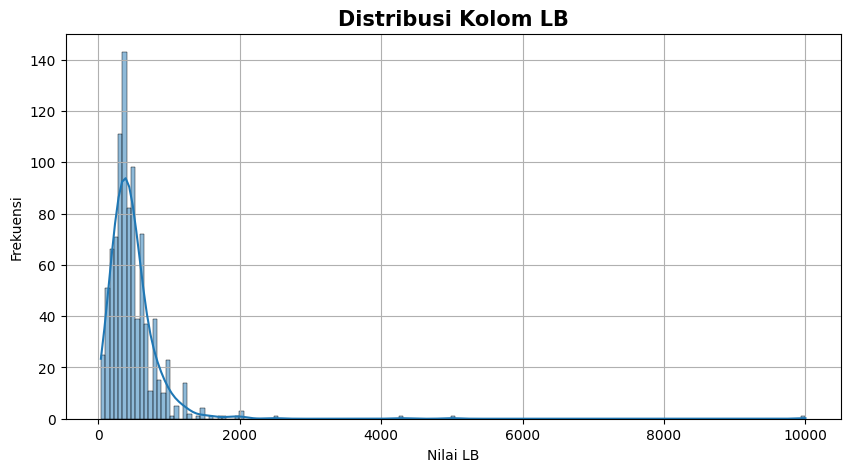

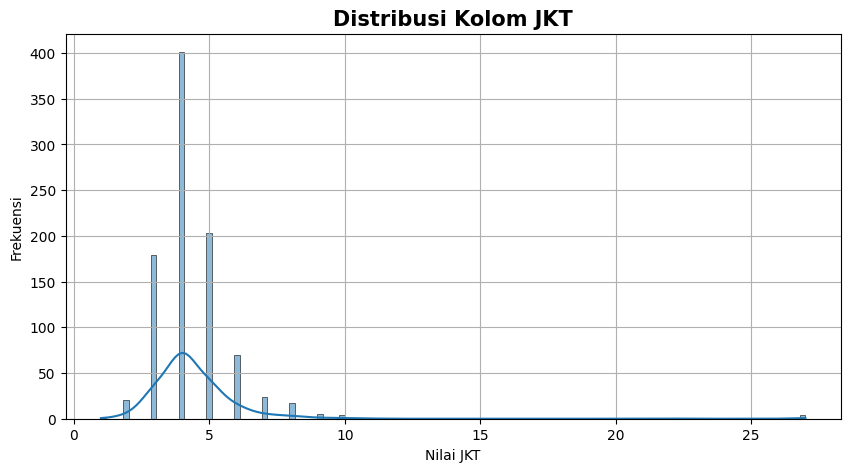

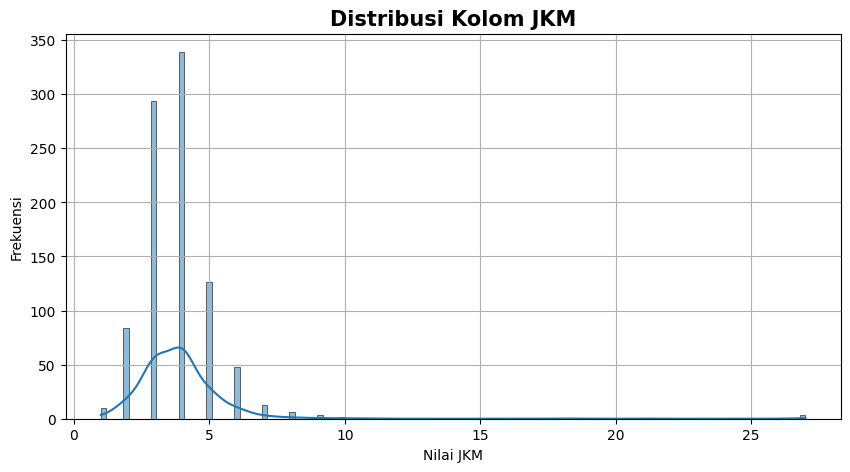

In [896]:
def visualisasi_histogram(df):
  # Dapetin kolom numerik
  col_num = df.select_dtypes(include='number').columns
  print(f"Kolom Numerik Berupa :  {col_num}")

  # Visualisasi distribusi menggunakan histogram
  print("\nVisualisasi Distribusi Setiap Fitur:")
  for column in col_num:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribusi Kolom {column}', fontweight='bold', fontsize=15)
    plt.xlabel(f'Nilai {column}')
    plt.ylabel(f'Frekuensi')
    plt.grid(True)
visualisasi_histogram(df)

Kolom Numerik Berupa :  Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM'], dtype='object', name=0)

Visualisasi Scatterplot Setiap Fitur:


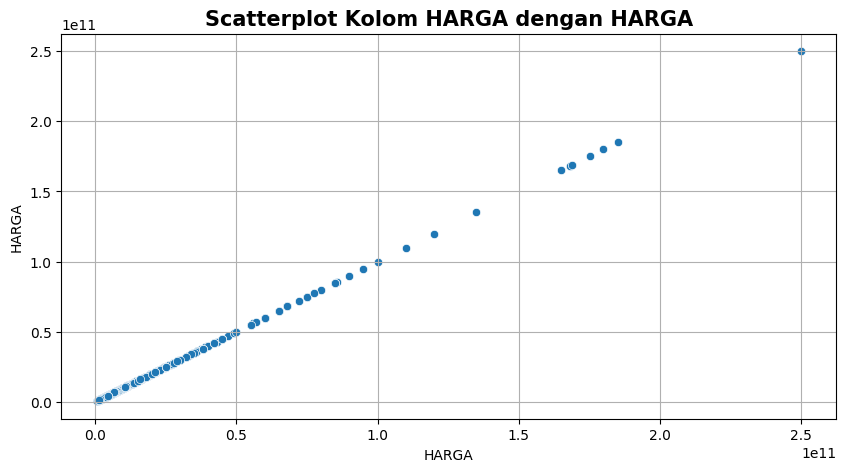

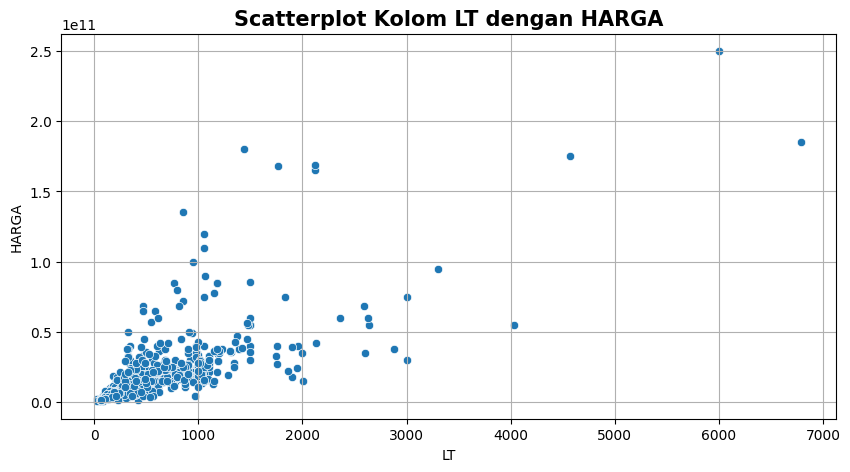

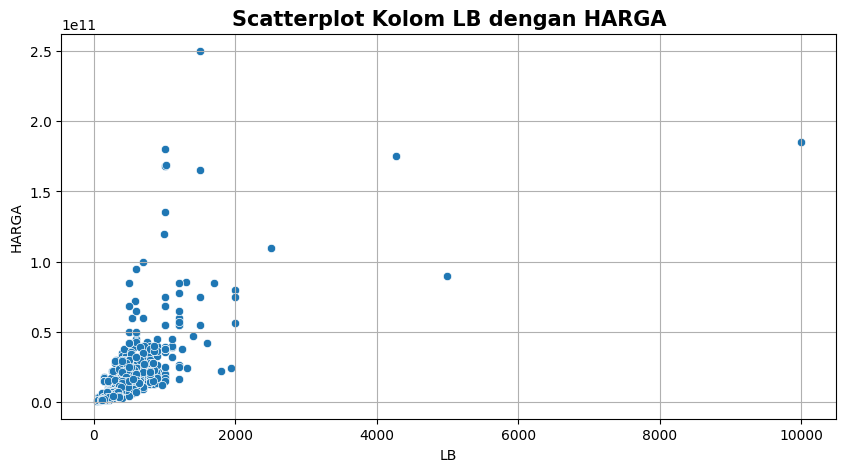

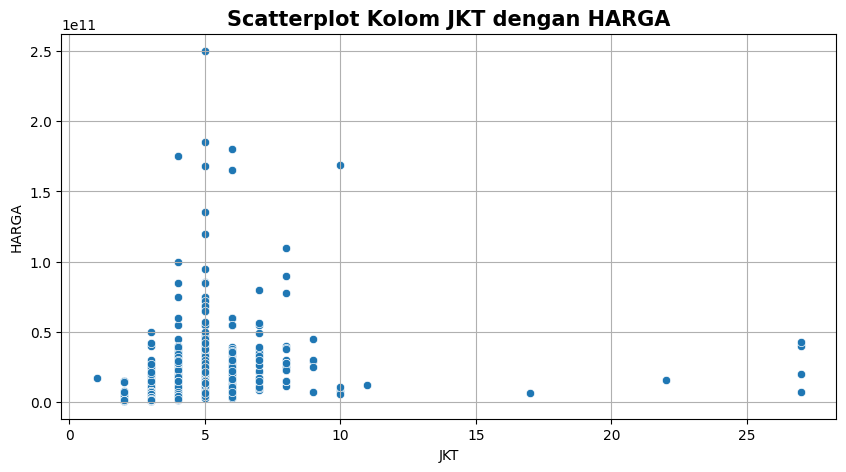

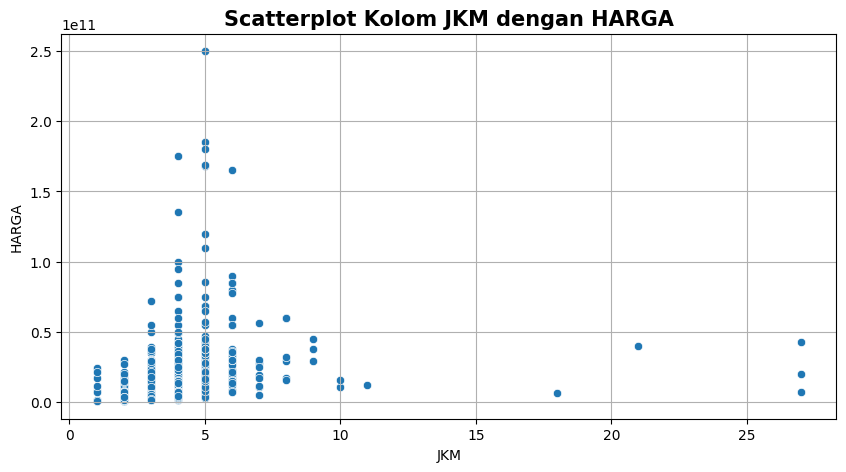

In [897]:
def visualisasi_scatter(df):
  # Dapetin kolom numerik
  col_num = df.select_dtypes(include='number').columns
  print(f"Kolom Numerik Berupa :  {col_num}")

  # Visualisasi scatterplot
  print("\nVisualisasi Scatterplot Setiap Fitur:")
  for column in col_num:
    plt.figure(figsize=(10, 5))
    # sns.histplot(data=df, x=column, kde=True)
    sns.scatterplot(x=column, y="HARGA", data=df)
    plt.title(f'Scatterplot Kolom {column} dengan HARGA', fontweight='bold', fontsize=15)
    plt.xlabel(f'{column}')
    plt.ylabel(f'HARGA')
    plt.grid(True)
visualisasi_scatter(df)


Boxplot untuk setiap fitur:


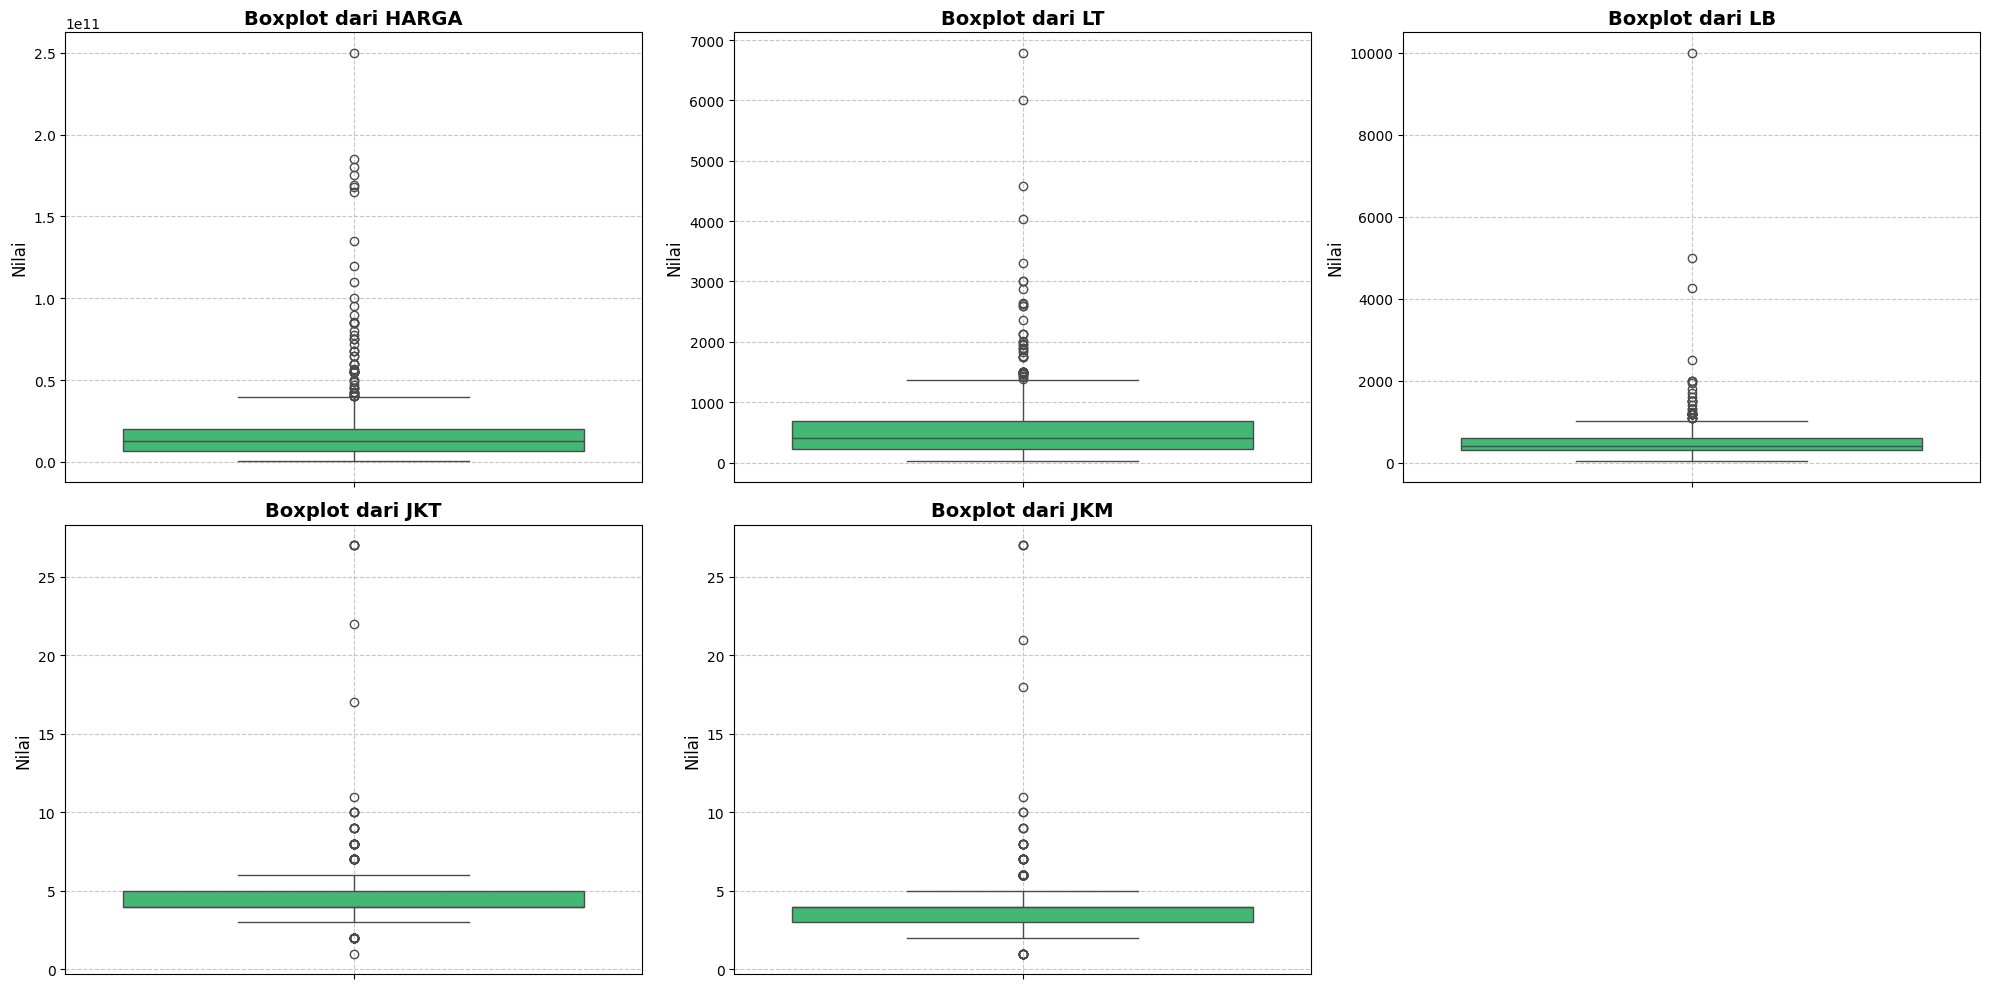

In [898]:
# Mendapatkan col num
col_num = df.select_dtypes(include='number').columns

# Visualisasi boxplot
print("\nBoxplot untuk setiap fitur:")
# Mendapatkan kolom dan row untuk subplot
num_columns = len(col_num)
num_rows = (num_columns + 2) // 3  # Atur 3 kolom per baris

# Kode visualisasi
plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(col_num):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(y=df[column], color='#2ecc71')
    plt.title(f'Boxplot dari {column}', fontsize=14, fontweight='bold')
    plt.ylabel('Nilai', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

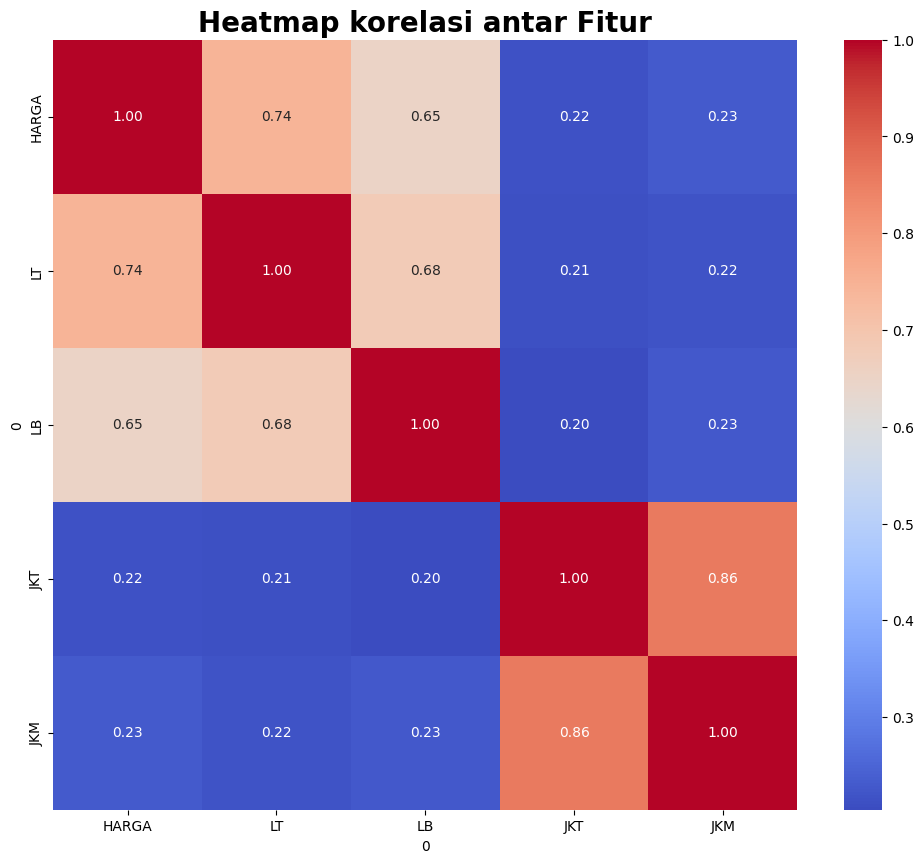

In [899]:
# Korelasi menggunakan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap korelasi antar Fitur', fontsize=20, fontweight='bold')
plt.show()

## **Data Preprocessing**

In [900]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df = pd.concat([df, one_hot_df], axis=1)

df = df.drop(categorical_columns, axis=1)
print(f"Data yang sudah di encoded : \n{df}")

Data yang sudah di encoded : 
            HARGA      LT     LB  JKT  JKM  GRS_ADA  GRS_TIDAK ADA  \
0    2.800000e+10  1100.0  700.0  5.0  6.0      1.0            0.0   
1    1.900000e+10   824.0  800.0  4.0  4.0      1.0            0.0   
2    4.700000e+09   500.0  400.0  4.0  3.0      1.0            0.0   
3    4.900000e+09   251.0  300.0  5.0  4.0      1.0            0.0   
4    2.800000e+10  1340.0  575.0  4.0  5.0      1.0            0.0   
..            ...     ...    ...  ...  ...      ...            ...   
926  1.600000e+10   488.0  550.0  6.0  5.0      1.0            0.0   
927  4.500000e+09   209.0  270.0  4.0  4.0      1.0            0.0   
928  2.900000e+10   692.0  400.0  4.0  3.0      0.0            1.0   
929  1.700000e+09   102.0  140.0  4.0  3.0      0.0            1.0   
930  1.250000e+09    63.0  110.0  3.0  3.0      0.0            1.0   

     KOTA_JAKSEL  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  
..           ..

In [901]:
# Melakukan log transformasi ke kolom yang masih distribusinya skewed
df[["HARGA", "LT", "LB"]] = np.log(df[["HARGA", "LT", "LB"]])

Kolom Numerik Berupa :  Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS_ADA', 'GRS_TIDAK ADA',
       'KOTA_JAKSEL'],
      dtype='object')

Visualisasi Distribusi Setiap Fitur:


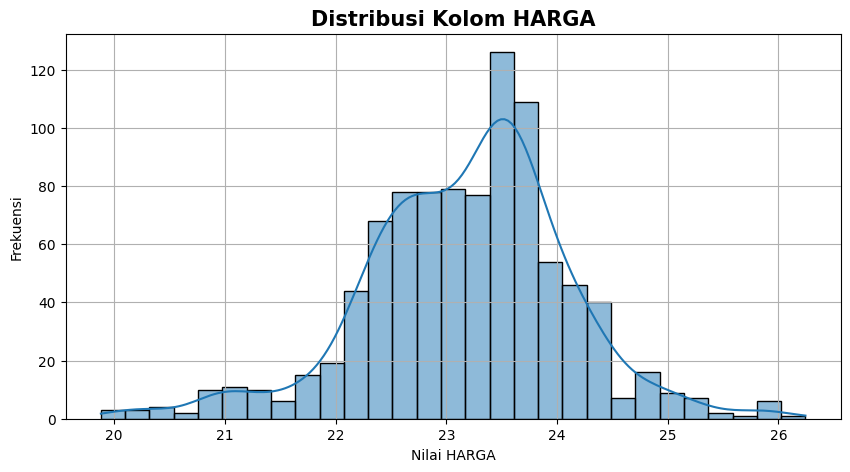

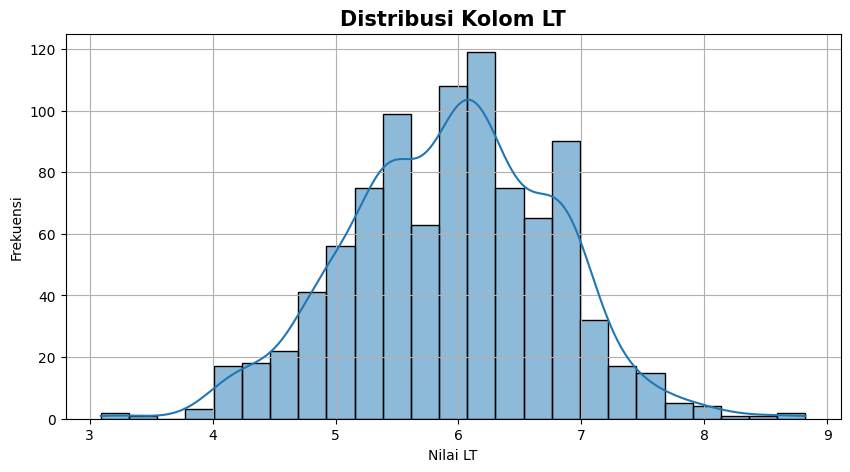

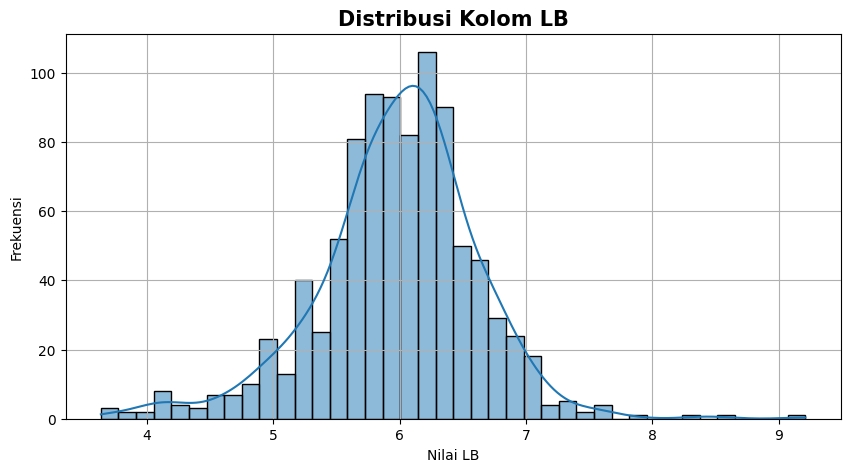

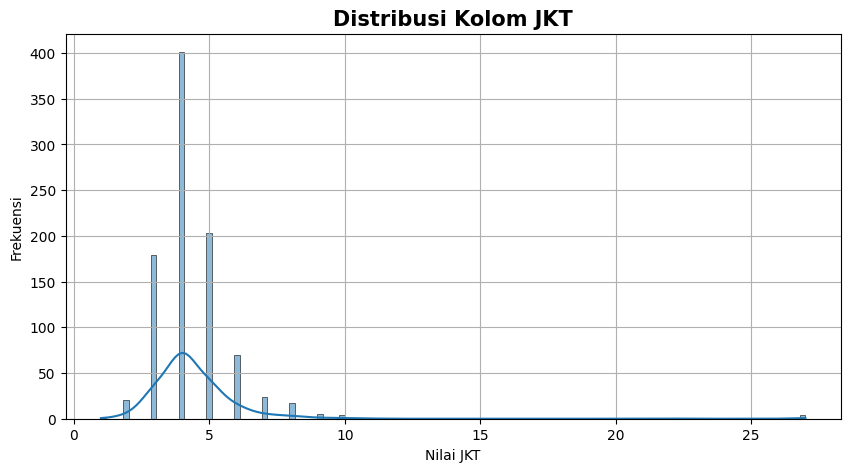

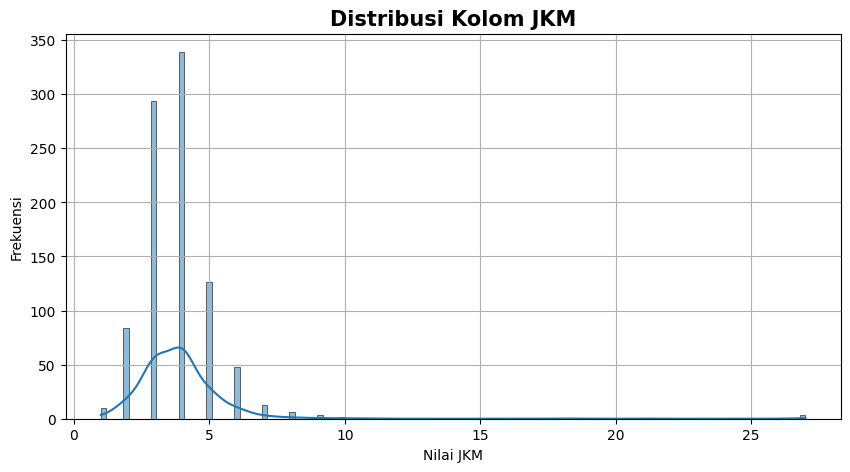

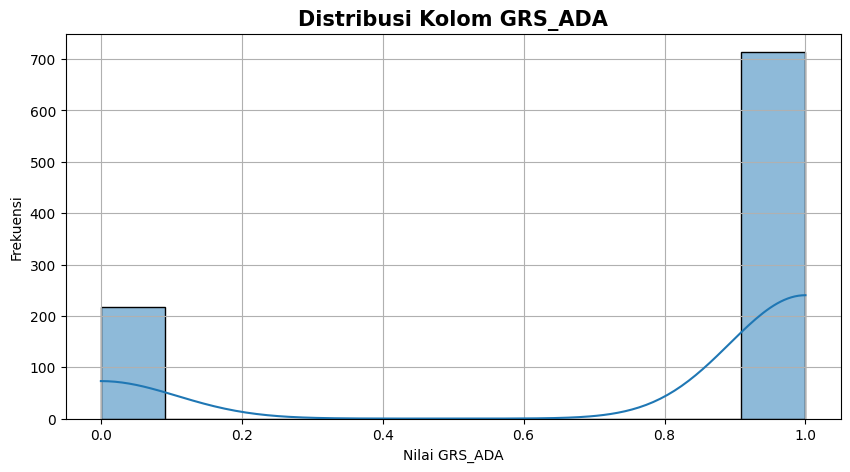

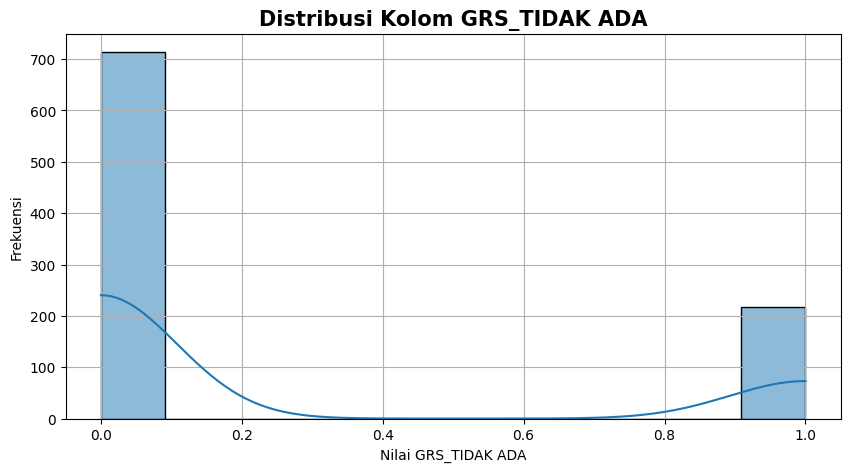

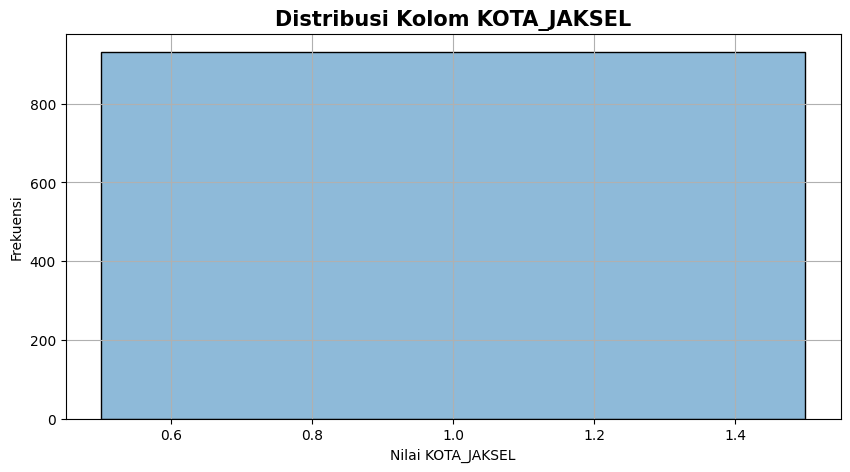

In [902]:
# Liat visualisasi histogram setelah transformasi fitur
visualisasi_histogram(df)

Kolom Numerik Berupa :  Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS_ADA', 'GRS_TIDAK ADA',
       'KOTA_JAKSEL'],
      dtype='object')

Visualisasi Scatterplot Setiap Fitur:


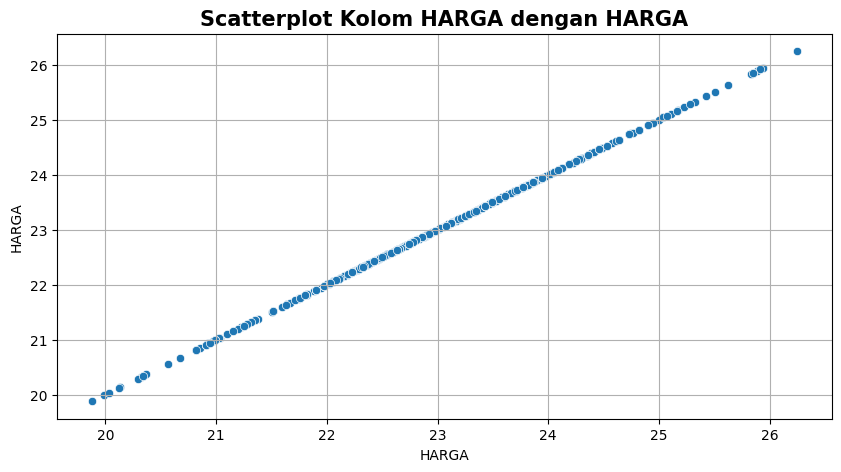

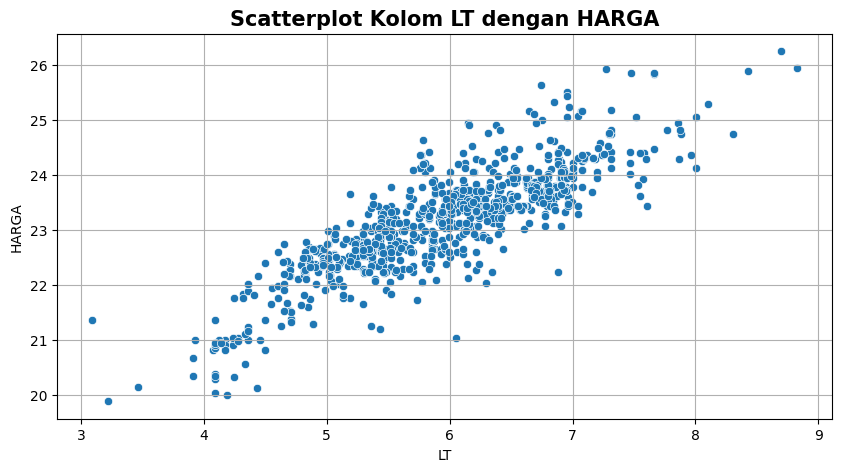

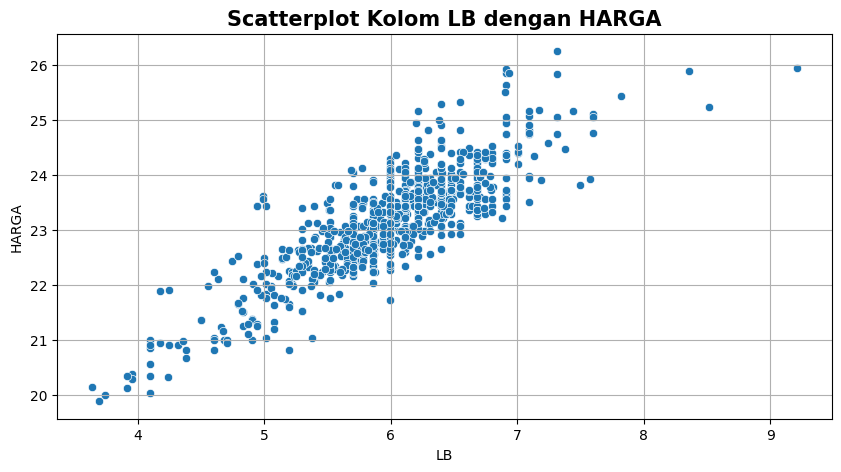

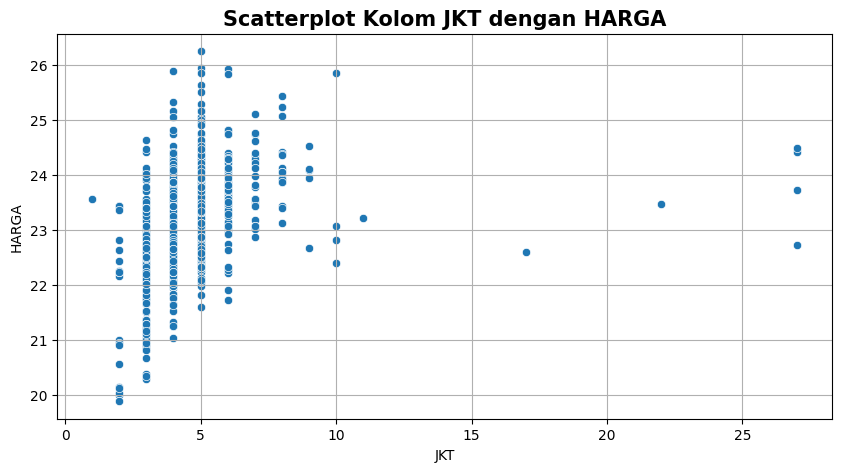

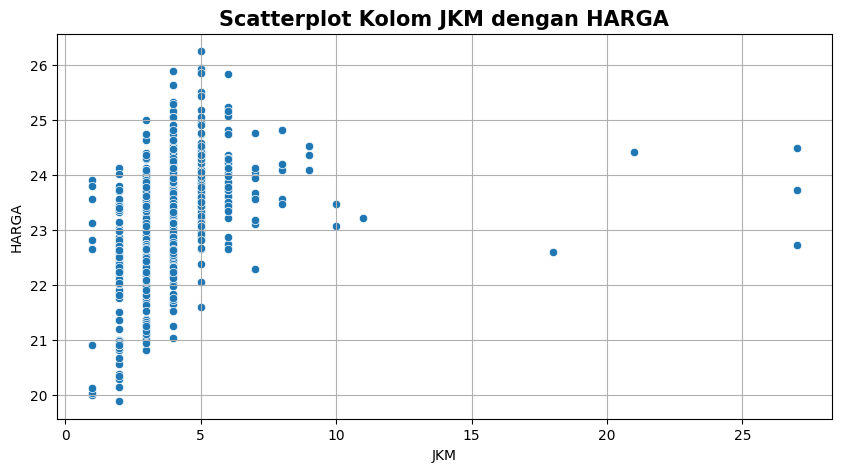

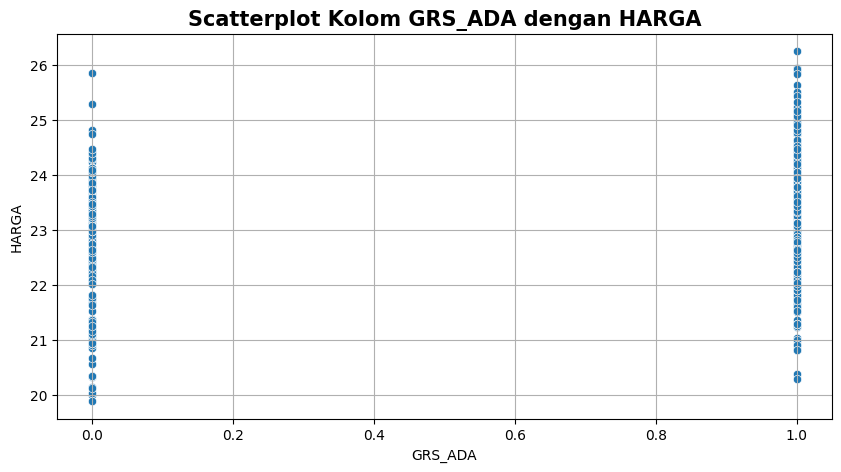

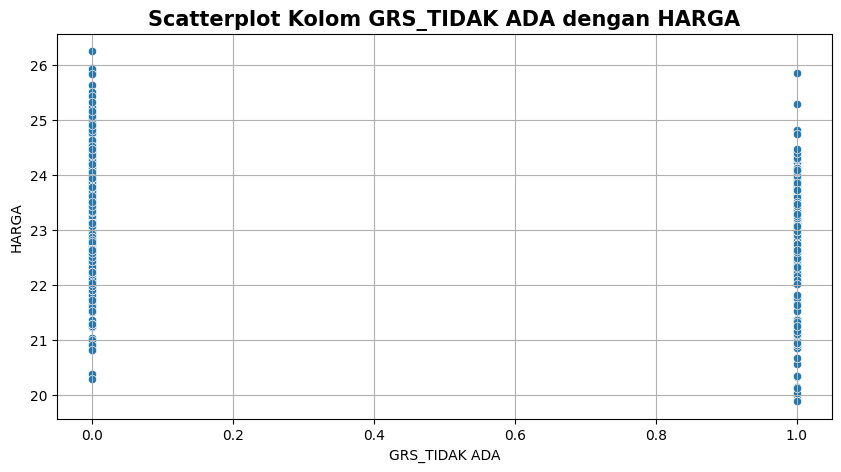

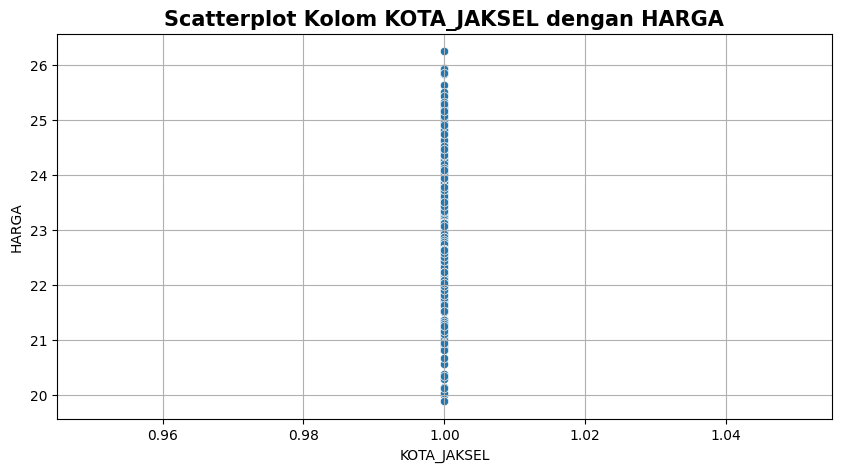

In [903]:
# Liat visualisasi scatterplot setelah transformasi
visualisasi_scatter(df)

In [904]:
# # JKM dan JKT tidak terlihat linear jadi kita transformasi
# df['JKM'] = np.log((df['JKM'])**5)
# df['JKT'] = np.log((df['JKT'])**5)

# # Liat hasil plot setelah transformasi
# visualisasi_scatter(df[["JKT", "JKM","HARGA"]])

In [905]:
# # JKM dan JKT tidak terlihat linear jadi kita transformasi
# df['JKM'] = np.log(df['JKM'])
# df['JKT'] = np.log(df['JKT'])

# # Liat hasil plot setelah transformasi
# visualisasi_scatter(df[["JKT", "JKM", "HARGA"]])

In [906]:
# # Drop kolom NO karena tidak berguna
# df = df.drop('NO', axis=1)

In [907]:
# Split the data into features (X) and target (y)
X = df.drop('HARGA', axis=1)
y = df['HARGA']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Untuk validatin sets
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [908]:
# Melihat yang semua kolom outlier
filt = ((X_train[["LT", "LB", "JKT","JKM"]] <= 3) & (X_train[["LT", "LB", "JKT","JKM"]] >= -3)).all(axis=1).value_counts()
filt

,count
False,558


In [909]:
# Normalisasi
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

## **Modeling**

In [910]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

## **NO 2**

In [911]:
# Prediksi
y_pred = knn.predict(X_test)

# Menghitung Performa
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_test))))
print("Evaluasi Model KNN pada Testing Set")
print("-" * 40)
print(f"MAE dari model KNN adalah : {mae}")
print(f"RMSE dari model KNN adalah : {rmse}")
print(f"R^2 dari model KNN adalah : {r2}")

Evaluasi Model KNN pada Testing Set
----------------------------------------
MAE dari model KNN adalah : 0.3481250594083872
RMSE dari model KNN adalah : 0.44807277670119366
R^2 dari model KNN adalah : 0.733988096075484


In [913]:
# Prediksi Validation sets
y_pred = knn.predict(X_val)

# Menghitung Performa
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_val))))
print("Evaluasi Model KNN pada Validation Set")
print("-" * 40)
print(f"MAE dari model KNN adalah : {mae}")
print(f"RMSE dari model KNN adalah : {rmse}")
print(f"R^2 dari model KNN adalah : {r2}")

Evaluasi Model KNN pada Validation Set
----------------------------------------
MAE dari model KNN adalah : 0.36918273872927043
RMSE dari model KNN adalah : 0.5022394865377825
R^2 dari model KNN adalah : 0.7004512048207711


## **NO 3**

## **LINEAR REGRESI**

**SEDERHANA**

In [914]:
# Sederhana fitur x nya hanya 1 kolom
# Split the data ke fitur (X) dan target (y)
X = df[['LT']]
y = df['HARGA']

# Split data ke training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Untuk validatin sets
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

# Normalisasi
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [915]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [916]:
# Prediksi Testing set
y_pred = lin_reg.predict(X_test)

# Menghitung Performa
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_test))))
print("Evaluasi Model Linear Regression (Sederhana) pada Testing Set")
print("-" * 80)
print(f"MAE dari model Linear Regression (Sederhana) adalah : {mae}")
print(f"RMSE dari model Linear Regression (Sederhana) adalah : {rmse}")
print(f"R^2 dari model Linear Regression (Sederhana) adalah : {r2}")

Evaluasi Model Linear Regression (Sederhana) pada Testing Set
--------------------------------------------------------------------------------
MAE dari model Linear Regression (Sederhana) adalah : 0.3654446444767693
RMSE dari model Linear Regression (Sederhana) adalah : 0.46673581109929135
R^2 dari model Linear Regression (Sederhana) adalah : 0.7440301392302076


In [917]:
# Prediksi Validation sets
y_pred = lin_reg.predict(X_val)

# Menghitung Performa
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_val))))
print("Evaluasi Model Linear Regression (Sederhana) pada Validation Set")
print("-" * 80)
print(f"MAE dari model Linear Regression (Sederhana) adalah : {mae}")
print(f"RMSE dari model Linear Regression (Sederhana) adalah : {rmse}")
print(f"R^2 dari model Linear Regression (Sederhana) adalah : {r2}")

Evaluasi Model Linear Regression (Sederhana) pada Validation Set
--------------------------------------------------------------------------------
MAE dari model Linear Regression (Sederhana) adalah : 0.37550332094729916
RMSE dari model Linear Regression (Sederhana) adalah : 0.5087620359012239
R^2 dari model Linear Regression (Sederhana) adalah : 0.7121048945466635


**BERGANDA**

In [918]:
# Split the data ke fitur (X) dan target (y)
X = df.drop('HARGA', axis=1)
y = df['HARGA']

# Split data ke training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

# Normalisasi
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [919]:
# Inisiasi dan latih model linear regresi
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [920]:
# Prediksi Testing set
y_pred = lin_reg.predict(X_test)

# Menghitung Performa
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_test))))
print("Evaluasi Model Linear Regression (Berganda) pada Validation Set")
print("-" * 80)
print(f"MAE dari model Linear Regression (Berganda) adalah : {mae}")
print(f"RMSE dari model Linear Regression (Berganda) adalah : {rmse}")
print(f"R^2 dari model Linear Regression (Berganda) adalah : {r2}")

Evaluasi Model Linear Regression (Berganda) pada Validation Set
--------------------------------------------------------------------------------
MAE dari model Linear Regression (Berganda) adalah : 0.3210504986119471
RMSE dari model Linear Regression (Berganda) adalah : 0.41959377909342543
R^2 dari model Linear Regression (Berganda) adalah : 0.8349035196712148


In [921]:
# Prediksi Validation set
y_pred = lin_reg.predict(X_val)

# Menghitung Performa
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_val))))
print("Evaluasi Model Linear Regression (Berganda) pada Validation Set")
print("-" * 80)
print(f"MAE dari model Linear Regression (Berganda) adalah : {mae}")
print(f"RMSE dari model Linear Regression (Berganda) adalah : {rmse}")
print(f"R^2 dari model Linear Regression (Berganda) adalah : {r2}")

Evaluasi Model Linear Regression (Berganda) pada Validation Set
--------------------------------------------------------------------------------
MAE dari model Linear Regression (Berganda) adalah : 0.29531035007035034
RMSE dari model Linear Regression (Berganda) adalah : 0.4024646983547657
R^2 dari model Linear Regression (Berganda) adalah : 0.7785479629772367


## **Decision Tree**

In [922]:
# Inisiasi dan latih model decision tree
dec_tree = DecisionTreeRegressor()
dec_tree = dec_tree.fit(X_train,y_train)

In [923]:
# Prediksi Testing
y_pred = dec_tree.predict(X_test)

# Menghitung Performa
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_test))))
print("Evaluasi Model Decision Tree pada Testing Set")
print("-" * 70)
print(f"MAE dari model Decision Tree adalah : {mae}")
print(f"RMSE dari model Decision Tree adalah : {rmse}")
print(f"R^2 dari model Decision Tree adalah : {r2}")

Evaluasi Model Decision Tree pada Testing Set
----------------------------------------------------------------------
MAE dari model Decision Tree adalah : 0.39568654378688656
RMSE dari model Decision Tree adalah : 0.5656308721072215
R^2 dari model Decision Tree adalah : 0.6999829449788357


In [924]:
# Prediksi Validation set
y_pred = dec_tree.predict(X_val)

# Menghitung Performa
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_val))))
print("Evaluasi Model Decision Tree pada Validation Set")
print("-" * 80)
print(f"MAE dari model Decision Tree adalah : {mae}")
print(f"RMSE dari model Decision Tree adalah : {rmse}")
print(f"R^2 dari model Decision Tree adalah : {r2}")

Evaluasi Model Decision Tree pada Validation Set
--------------------------------------------------------------------------------
MAE dari model Decision Tree adalah : 0.3840297565662618
RMSE dari model Decision Tree adalah : 0.5333358997597685
R^2 dari model Decision Tree adalah : 0.6111109369565529


## **Random Forest**

In [925]:
# Inisiasi dan latih model random forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [926]:
# Prediksi
y_pred = rf.predict(X_test)

# Menghitung Performa
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_test))))
print(f"MAE dari model Random Forest adalah : {mae}")
print(f"RMSE dari model Random Forest adalah : {rmse}")
print(f"R^2 dari model Random Forest adalah : {r2}")

MAE dari model Random Forest adalah : 0.3151613644134377
RMSE dari model Random Forest adalah : 0.42780373723122583
R^2 dari model Random Forest adalah : 0.8283796111496147


In [927]:
# Prediksi Validation set
y_pred = rf.predict(X_val)

# Menghitung Performa
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_val))))
print("Evaluasi Random Forest pada Validation Set")
print("-" * 80)
print(f"MAE dari Random Forest adalah : {mae}")
print(f"RMSE dari Random Forest adalah : {rmse}")
print(f"R^2 dari Random Forest adalah : {r2}")

Evaluasi Random Forest pada Validation Set
--------------------------------------------------------------------------------
MAE dari Random Forest adalah : 0.29645972861332187
RMSE dari Random Forest adalah : 0.41571972250669326
R^2 dari Random Forest adalah : 0.7637208764148473
